In [2]:
'''
This is all multi-class predition
1. It is going to be attempted to predict what outcome is more likely to have each type of crime based on data
2. It is going to be attempted to predict what city is more likely to have what type of crime based on data
3. it is goint to be attempted to predict type of crime per location or district

algorithms: 
1. K-NN 
2. Random Forest - DT ? 
3. Linear Regression ? 
'''

'\nThis is all multi-class predition\n1. It is going to be attempted to predict what outcome is more likely to have each type of crime based on data\n2. It is going to be attempted to predict what city is more likely to have what type of crime based on data\n3. it is goint to be attempted to predict type of crime per location or district\n\nalgorithms: \n1. K-NN \n2. \n3.\n'

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [4]:
#loading data file
df_sf = pd.read_csv('Datasets\Police_Department_Incidents.csv')

In [6]:
#preprocessing
#handling unique missing value by dropping it
df_sf = df_sf.dropna()
df_sf.isnull().sum() 

IncidntNum    0
Category      0
Descript      0
DayOfWeek     0
Date          0
Time          0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
Location      0
PdId          0
dtype: int64

In [7]:
#Getting datasets ready 

In [9]:
#values per categories (aka classes)
df_sf["Category"].value_counts()

LARCENY/THEFT                  40408
OTHER OFFENSES                 19599
NON-CRIMINAL                   17866
ASSAULT                        13577
VANDALISM                       8589
VEHICLE THEFT                   6419
WARRANTS                        5914
BURGLARY                        5802
SUSPICIOUS OCC                  5782
MISSING PERSON                  4338
DRUG/NARCOTIC                   4243
ROBBERY                         3299
FRAUD                           2635
SECONDARY CODES                 1841
TRESPASS                        1812
WEAPON LAWS                     1658
SEX OFFENSES, FORCIBLE           940
STOLEN PROPERTY                  882
RECOVERED VEHICLE                736
DISORDERLY CONDUCT               658
PROSTITUTION                     641
FORGERY/COUNTERFEITING           619
DRUNKENNESS                      465
DRIVING UNDER THE INFLUENCE      378
ARSON                            286
KIDNAPPING                       257
EMBEZZLEMENT                     168
L

In [10]:
#most data will be subdivided in subsets of categories for more balances classification
categories = df_sf['Category'].unique()
districts = df_sf['PdDistrict'].unique()
data = []
for cat in categories:
    get_data = []
    for distr in districts:
        get_data.append(len(df_sf[(df_sf['PdDistrict'] == distr) & (df_sf['Category'] == cat)]))
    data.append(get_data)

heat_df = pd.DataFrame(data, index=categories, columns=districts)


In [11]:
heat_df.duplicated()

WEAPON LAWS                    False
WARRANTS                       False
NON-CRIMINAL                   False
ASSAULT                        False
OTHER OFFENSES                 False
MISSING PERSON                 False
LARCENY/THEFT                  False
BURGLARY                       False
STOLEN PROPERTY                False
ROBBERY                        False
FRAUD                          False
DRUG/NARCOTIC                  False
VEHICLE THEFT                  False
RECOVERED VEHICLE              False
VANDALISM                      False
ARSON                          False
PROSTITUTION                   False
SECONDARY CODES                False
SUSPICIOUS OCC                 False
DRUNKENNESS                    False
TRESPASS                       False
SEX OFFENSES, NON FORCIBLE     False
SEX OFFENSES, FORCIBLE         False
RUNAWAY                        False
KIDNAPPING                     False
DISORDERLY CONDUCT             False
DRIVING UNDER THE INFLUENCE    False
F

In [12]:
heat_df

,SOUTHERN,BAYVIEW,TENDERLOIN,MISSION,NORTHERN,TARAVAL,INGLESIDE,CENTRAL,RICHMOND,PARK
WEAPON LAWS,306,306,131,278,131,106,157,122,56,65
WARRANTS,1367,548,739,1073,624,273,307,489,175,319
NON-CRIMINAL,3402,1312,1379,2261,2053,1424,1236,2310,1246,1243
ASSAULT,2352,1775,1196,2110,1536,918,1506,1187,473,524
OTHER OFFENSES,3336,2353,1237,2990,2219,1751,1867,1737,1022,1087
MISSING PERSON,617,484,170,532,398,439,536,288,229,645
LARCENY/THEFT,9203,2357,1825,3321,7219,2605,1781,6740,3133,2224
BURGLARY,842,521,161,793,803,695,534,645,395,413
STOLEN PROPERTY,195,59,52,104,123,52,56,156,48,37
ROBBERY,588,314,352,547,388,180,313,395,101,121


In [13]:
heat_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39 entries, WEAPON LAWS to PORNOGRAPHY/OBSCENE MAT
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   SOUTHERN    39 non-null     int64
 1   BAYVIEW     39 non-null     int64
 2   TENDERLOIN  39 non-null     int64
 3   MISSION     39 non-null     int64
 4   NORTHERN    39 non-null     int64
 5   TARAVAL     39 non-null     int64
 6   INGLESIDE   39 non-null     int64
 7   CENTRAL     39 non-null     int64
 8   RICHMOND    39 non-null     int64
 9   PARK        39 non-null     int64
dtypes: int64(10)
memory usage: 4.6+ KB


In [14]:
heat_df.describe()

,SOUTHERN,BAYVIEW,TENDERLOIN,MISSION,NORTHERN,TARAVAL,INGLESIDE,CENTRAL,RICHMOND,PARK
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,729.358974,366.743590,254.923077,500.076923,515.384615,290.384615,297.282051,452.974359,228.769231,223.051282
std,1625.948007,620.895055,452.486777,827.351684,1230.634488,545.227119,503.552378,1150.358994,551.088992,438.892802
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,9.500000,15.000000,5.000000,12.000000,9.500000,15.000000,8.000000,10.000000,5.000000,4.000000
50%,142.000000,60.000000,46.000000,101.000000,96.000000,49.000000,43.000000,52.000000,35.000000,29.000000
75%,615.000000,405.500000,165.500000,593.000000,462.500000,275.500000,310.000000,400.500000,188.500000,271.500000
max,9203.000000,2357.000000,1825.000000,3321.000000,7219.000000,2605.000000,1867.000000,6740.000000,3133.000000,2224.000000


In [17]:
df_sf["PdDistrict"].value_counts()

SOUTHERN      28445
NORTHERN      20100
MISSION       19503
CENTRAL       17666
BAYVIEW       14303
INGLESIDE     11594
TARAVAL       11325
TENDERLOIN     9942
RICHMOND       8922
PARK           8699
Name: PdDistrict, dtype: int64

In [15]:
'''
Class: District 
Features used for prediction: 
X, Y, District, Crime type

There is a massive imabalance betweent he classification possibilites, 
therefore, the dataset will be redistributied in such way where there is more balance between the classes.
These dataset will be: 

Binary classification!!
Classes 1: 20000 +

SOUTHERN      28445 
NORTHERN      20100

Classes 2: 10000 - 20000 

MISSION       19503
CENTRAL       17666
BAYVIEW       14303
INGLESIDE     11594
TARAVAL       11325

Classes 3: 0 - 10000

TENDERLOIN     9942
RICHMOND       8922
PARK           8699


'''

'\nClass: District \nFeatures used for prediction: \nX, Y, District, Crime type\n\nThere is a massive imabalance betweent he classification possibilites, \ntherefore, the dataset will be redistributied in such way where there is more balance between the classes.\nThese dataset will be: \n\nClasses 1:\n\n\nClasses 2: \n\n\n\nClasses 3:\n\n\n\n\n'

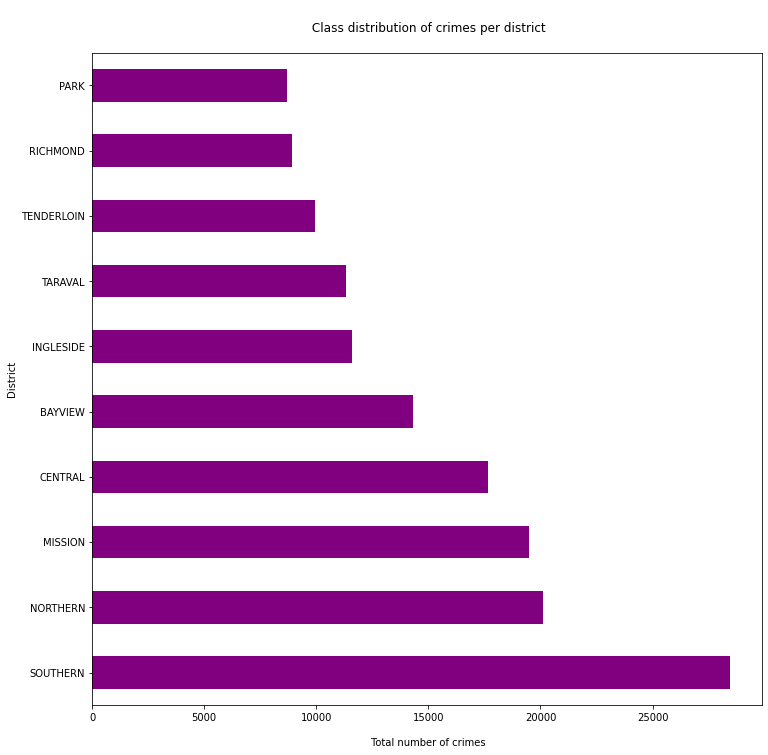

In [16]:
#number of crimes per district barchart with matplotbil
fig=plt.figure(figsize=(12, 12))
p_d = df_sf['PdDistrict'].value_counts()
plt.title("\n Class distribution of crimes per district\n")
plt.xlabel("\n Total number of crimes")
plt.ylabel("District") 
ax = p_d.plot(kind='barh', color='purple')